In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [2]:
# Step 2: Load the Data
# Load the dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
df = pd.read_csv(url)


In [3]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [4]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handling missing values
df.fillna(df.median(), inplace=True)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


TypeError: could not convert string to float: 'NEAR BAY'

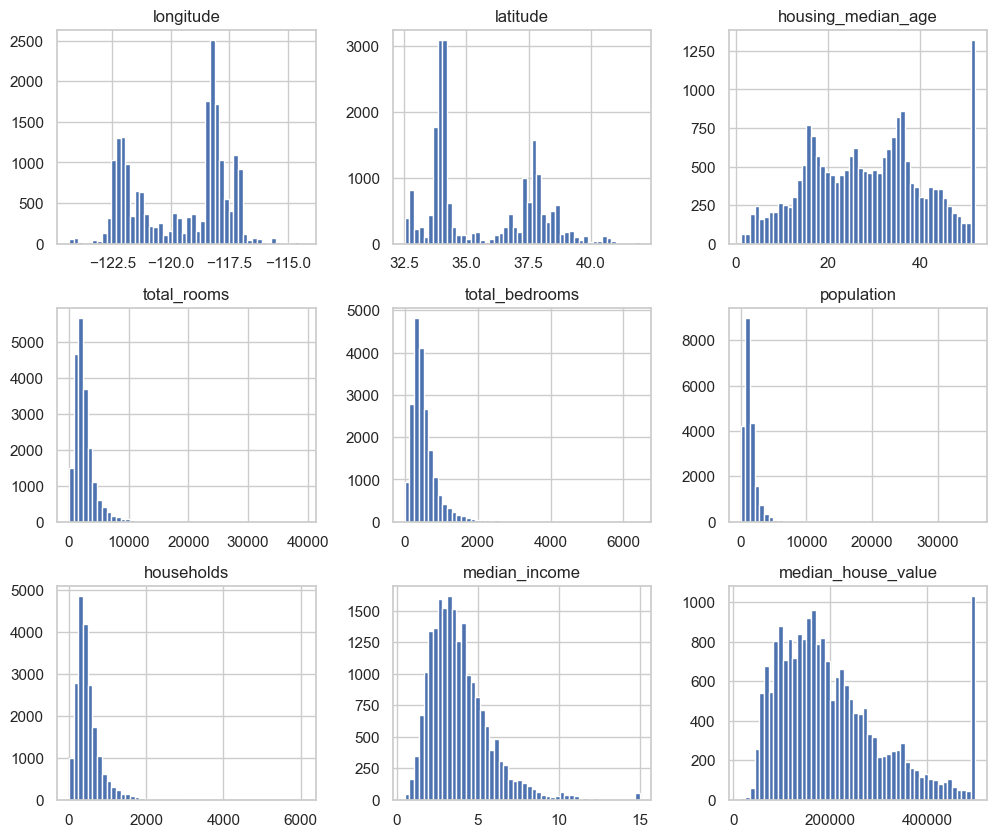

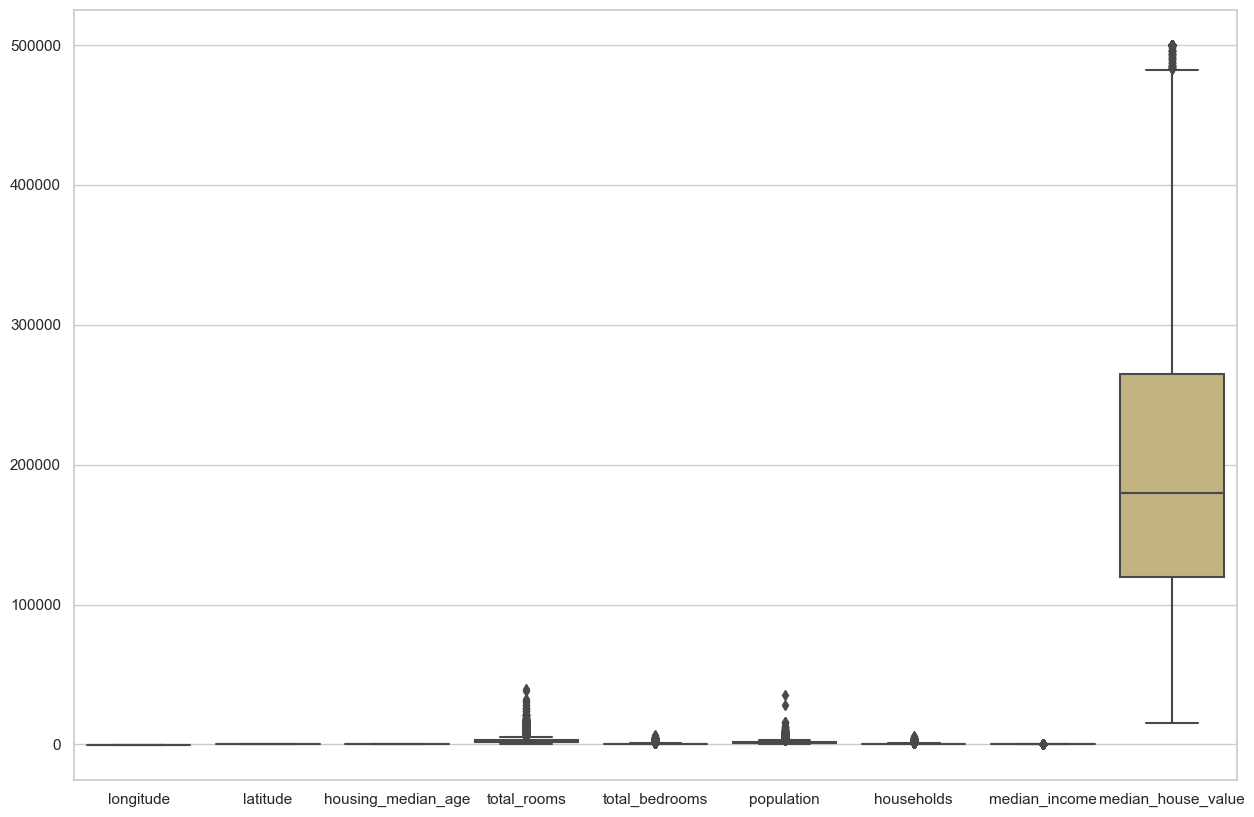

ValueError: could not convert string to float: 'NEAR BAY'

<Figure size 1500x1000 with 0 Axes>

In [5]:
# Step 5: Data Visualization
# Histograms for numerical columns
df.hist(figsize=(12, 10), bins=50)
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for relationships between variables
sns.pairplot(df)
plt.show()


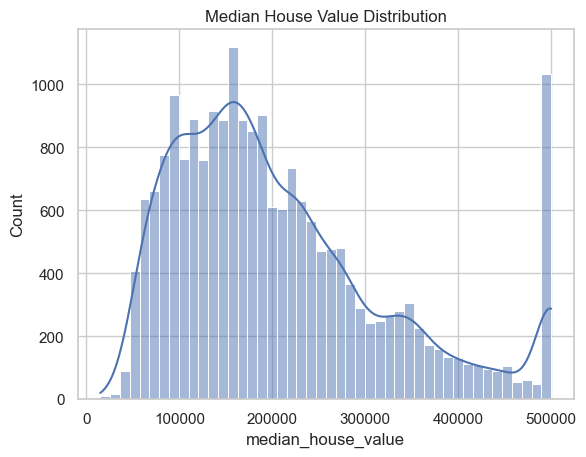

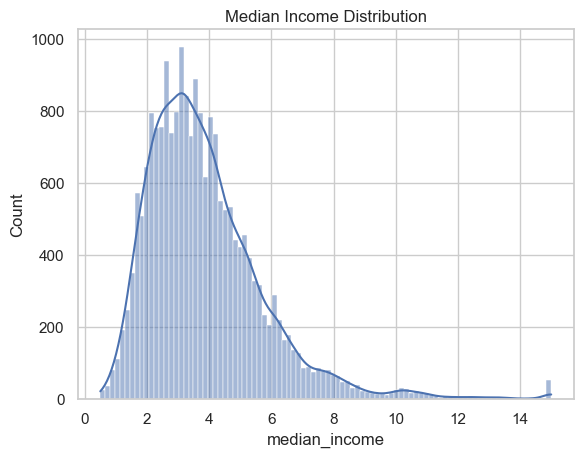

In [6]:
# Step 6: Univariate Analysis
# Distribution of median house value
sns.histplot(df['median_house_value'], kde=True)
plt.title('Median House Value Distribution')
plt.show()

# Distribution of median income
sns.histplot(df['median_income'], kde=True)
plt.title('Median Income Distribution')
plt.show()


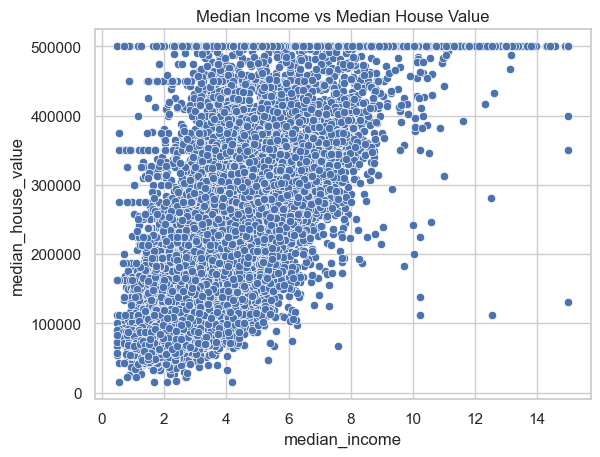

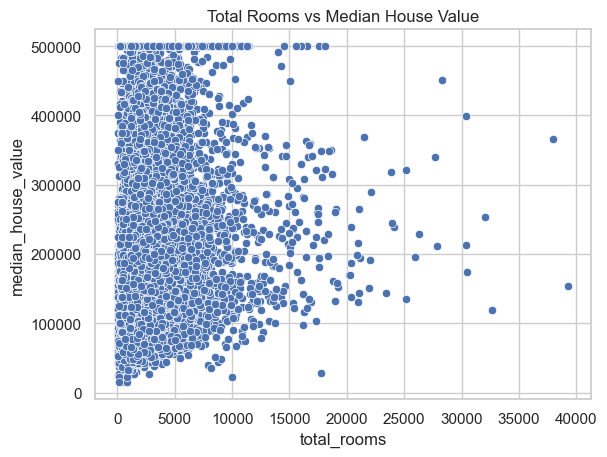

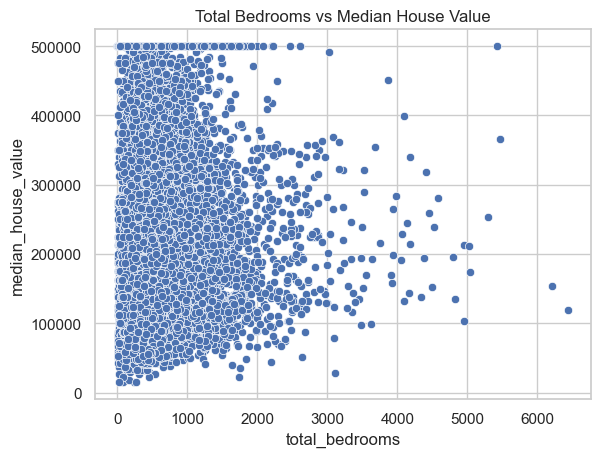

In [7]:
# Step 7: Bivariate Analysis
# Median income vs Median house value
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median Income vs Median House Value')
plt.show()

# Total rooms vs Median house value
sns.scatterplot(x='total_rooms', y='median_house_value', data=df)
plt.title('Total Rooms vs Median House Value')
plt.show()

# Total bedrooms vs Median house value
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=df)
plt.title('Total Bedrooms vs Median House Value')
plt.show()


In [8]:
# Step 8: Multivariate Analysis
# Heatmap for correlations
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for multiple variables
sns.pairplot(df)
plt.show()


ValueError: could not convert string to float: 'NEAR BAY'

<Figure size 1500x1000 with 0 Axes>

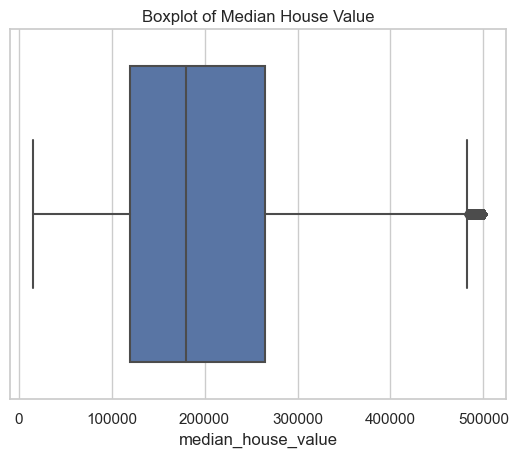

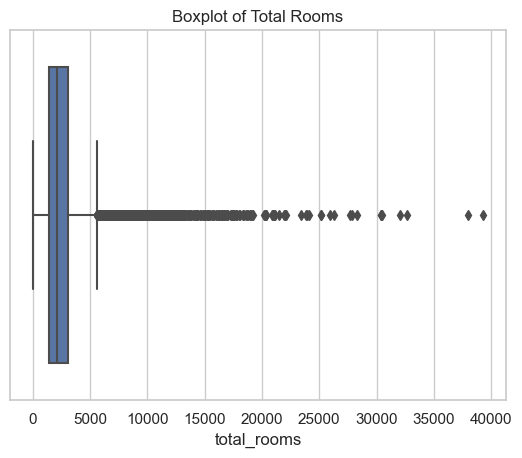

In [12]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in median house value
sns.boxplot(x=df['median_house_value'])
plt.title('Boxplot of Median House Value')
plt.show()

# Removing outliers from median house value
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['median_house_value'] < (Q1 - 1.5 * IQR)) | (df['median_house_value'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in total rooms
sns.boxplot(x=df['total_rooms'])
plt.title('Boxplot of Total Rooms')
plt.show()

# Removing outliers from total rooms
Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['total_rooms'] < (Q1 - 1.5 * IQR)) | (df['total_rooms'] > (Q3 + 1.5 * IQR)))]


In [13]:
# Step 10: Feature Engineering
# Create new feature: rooms_per_household
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Create new feature: bedrooms_per_room
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Create new feature: population_per_household
df['population_per_household'] = df['population'] / df['households']


In [14]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Median house value vs Median income
income_house_value = df.groupby('median_income')['median_house_value'].mean()
print(f"Average Median House Value by Median Income:\n{income_house_value}")

# Median house value vs Total rooms
rooms_house_value = df.groupby('total_rooms')['median_house_value'].mean()
print(f"Average Median House Value by Total Rooms:\n{rooms_house_value}")

# Median house value vs Bedrooms per room
bedrooms_per_room_house_value = df.groupby('bedrooms_per_room')['median_house_value'].mean()
print(f"Average Median House Value by Bedrooms Per Room:\n{bedrooms_per_room_house_value}")

# Median house value vs Rooms per household
rooms_per_household_house_value = df.groupby('rooms_per_household')['median_house_value'].mean()
print(f"Average Median House Value by Rooms Per Household:\n{rooms_per_household_house_value}")


Key Insights:
Average Median House Value by Median Income:
median_income
0.4999      96330.000000
0.5360     166999.900000
0.5495      91700.000000
0.6433     111300.000000
0.6775     350000.000000
               ...      
12.5000    281000.000000
12.5381    112500.000000
12.5915    432400.000000
13.1107    467600.000000
15.0001    293766.666667
Name: median_house_value, Length: 11217, dtype: float64
Average Median House Value by Total Rooms:
total_rooms
2.0       137500.0
6.0        55000.0
11.0      162500.0
12.0       67500.0
15.0      256250.0
            ...   
5644.0    312000.0
5645.0    330900.0
5647.0    348300.0
5648.0     78000.0
5650.0    249900.0
Name: median_house_value, Length: 4703, dtype: float64
Average Median House Value by Bedrooms Per Room:
bedrooms_per_room
0.100000    333333.333333
0.112832    432400.000000
0.113535    454300.000000
0.114593    477600.000000
0.114901    467600.000000
                ...      
0.750000     25000.000000
0.780347    225000.000000
0.

Findings:
1. Median Income: Higher median income is strongly correlated with higher median house values.
2. Total Rooms: More total rooms are generally associated with higher house values.
3. Bedrooms per Room: A lower ratio of bedrooms per room is associated with higher house values, suggesting that houses with more rooms and fewer bedrooms are more valuable.
4. Rooms per Household: Higher rooms per household are associated with higher house values.